# Descripción y Exploración de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def por_mes(data, mes):
    data['fecha']=pd.to_datetime(data['fecha'])
    return data[data['fecha'].dt.month == mes]

''' Leer archivos'''
def leer_archivo(archivo):
    if (archivo.count('indices') > 0):
        ruta = '../datos/3.0.spi_spei/'
    else:
        ruta = '../datos/1.0.variables/'   
    data = pd.read_csv(ruta + archivo)    
    data['fecha'] = pd.to_datetime(data['fecha'])
    return data

''' Melt por variables'''
def melt_var(data):
    valores_melt = data.columns.difference(pd.Index(['fecha']))
    data = pd.melt(data,id_vars=['fecha'], value_vars=valores_melt, var_name='id', value_name='valor')
    data = data.sort_values(by=['fecha','id']).reset_index(drop=True)
    return data

''' Procesar los archivos'''
def procesar(lista_datos, nom_columnas, estaciones):
    dato_final = pd.DataFrame(columns=nom_columnas)
    
    for l in range(len(lista_datos)):
        variable = leer_archivo(lista_datos[l])
        variable_melt = melt_var(variable)
        if l == 0:
            dato_final['fecha'] = variable_melt['fecha']
            dato_final['anio'] = pd.DatetimeIndex(variable_melt['fecha']).year
            dato_final['mes'] = pd.DatetimeIndex(variable_melt['fecha']).month
            dato_final['id'] = variable_melt['id']
            dato_final['pp'] = variable_melt['valor']
        else:
            col = dato_final.columns[l+4]
            dato_final[col] = variable_melt['valor']
    dato_final = dato_final.round(3)
    dato_final['id'] = dato_final['id'].astype(int)
    
    return pd.merge(dato_final,estaciones,on='id').sort_values(by=['fecha','id']).reset_index(drop=True)

In [6]:
# Leer los datos de las estaciones
nom_cols = ['id','estacion','depto','altitud','lat','lon','codigo']
estaciones = pd.read_csv('../datos/1.0.Estaciones/estaciones_senamhi_generado.csv', usecols=nom_cols)

# Nombres de los archivos a leer
fuente_datos = ['chirps_mensual_pp_bc.csv','nasa_mensual_tmax_bc.csv','nasa_mensual_tmin_bc.csv',
                'nasa_mensual_tmed_bc.csv','nasa_mensual_hmed_bc.csv',
                'indices_spi3.csv','indices_spi6.csv','indices_spi12.csv',
                'indices_spei3.csv','indices_spei6.csv','indices_spei12.csv']

# Nombres de columnas de dataframe resultante
columnas = ['fecha','anio','mes','id','pp',
            'tmax','tmin','tmed','hmed','spi3','spi6','spi12','spei3','spei6','spei12']

# Ejecutar la conversion
datos = procesar(fuente_datos, columnas, estaciones)




In [7]:
datos

,fecha,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,...,spi12,spei3,spei6,spei12,estacion,depto,altitud,lon,lat,codigo
0,1981-01-01,1981,1,100,118.149,17.982,5.146,9.016,71.542,NaN,...,NaN,NaN,NaN,NaN,aeropuerto,oruro,3702,-67.079722,-17.952778,4012
1,1981-01-01,1981,1,101,102.230,18.527,4.454,11.806,61.035,NaN,...,NaN,NaN,NaN,NaN,andamarca,oruro,3762,-67.506389,-18.771944,4001
2,1981-01-01,1981,1,102,119.242,13.613,4.576,9.673,67.903,NaN,...,NaN,NaN,NaN,NaN,antequera,oruro,4057,-66.882900,-18.492900,4080
3,1981-01-01,1981,1,105,109.041,13.945,3.853,9.016,71.542,NaN,...,NaN,NaN,NaN,NaN,chillca,oruro,4025,-66.813889,-17.836944,4026
4,1981-01-01,1981,1,106,219.247,16.667,4.118,9.505,65.021,NaN,...,NaN,NaN,NaN,NaN,choquecota,oruro,3867,-67.899000,-18.097000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,2020-12-01,2020,12,201,65.049,18.667,3.510,9.345,71.553,-0.603,...,0.197,-0.804,-0.518,0.031,ayoayo,lapaz,3888,-68.008300,-17.094200,0
11516,2020-12-01,2020,12,202,50.989,17.523,2.029,8.604,55.780,0.049,...,-0.155,-0.286,-0.612,-0.564,berenguela,lapaz,4120,-69.214167,-17.288889,0
11517,2020-12-01,2020,12,203,87.368,20.312,2.292,10.725,58.419,-0.057,...,-0.576,-0.477,-0.693,-0.822,calacoto,lapaz,3826,-68.635600,-17.280600,0
11518,2020-12-01,2020,12,204,104.318,13.316,-0.246,9.509,59.164,0.572,...,-0.029,0.383,0.124,-0.277,catacora,lapaz,4253,-69.486389,-17.158611,0


In [8]:
datos.to_csv('../datos/1.0.Estaciones/datos_total.csv', index = False)

In [9]:
datos.describe()

,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,spi6,spi12,spei3,spei6,spei12,altitud,lon,lat,codigo
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11472.000000,11400.000000,11256.000000,11472.000,11400.000000,11256.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,2000.500000,6.500000,134.166667,33.598820,17.037100,-0.729409,7.806132,51.602942,0.008031,0.004233,0.002627,-inf,0.005394,0.005164,3873.541667,-67.885577,-18.140744,2183.333333
std,11.543897,3.452202,39.867826,45.131442,2.265388,4.281310,2.793143,12.601594,0.975905,0.979344,0.984134,NaN,0.982430,0.980756,139.161223,0.782328,0.683928,2008.560099
min,1981.000000,1.000000,100.000000,0.000000,8.696000,-12.520000,0.604000,11.573000,-3.568000,-3.534000,-2.980000,-inf,-2.837000,-2.461000,3702.000000,-69.486389,-19.275000,0.000000
25%,1990.750000,3.750000,107.750000,5.101250,15.624750,-3.952000,5.488500,42.473500,-0.688000,-0.676000,-0.637000,-0.759,-0.751000,-0.733250,3761.000000,-68.469733,-18.775764,0.000000
50%,2000.500000,6.500000,115.500000,14.466500,17.184500,0.023500,8.275000,52.351000,0.007500,0.002000,0.017000,-0.004,-0.018000,-0.010000,3854.500000,-67.788806,-18.137389,4003.000000
75%,2010.250000,9.250000,140.750000,45.846750,18.607500,2.924000,9.939000,61.476500,0.661000,0.666000,0.666250,0.754,0.758000,0.732000,3929.000000,-67.324431,-17.670319,4023.750000
max,2020.000000,12.000000,205.000000,450.919000,23.780000,8.213000,15.486000,81.417000,3.993000,3.743000,3.032000,2.741,2.610000,2.473000,4253.000000,-66.777778,-17.094200,4083.000000


In [10]:
consulta1 = datos
estacion = 102
consulta1=consulta1[consulta1['estacion'].astype(int) == estacion].reset_index(drop=True)

ValueError: invalid literal for int() with base 10: 'aeropuerto'

In [ ]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'pp'], 'g', label='Precipitación', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
# plt.title("Precipitación - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.title(" ", fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('mm', fontweight='bold',fontsize=22)
plt.show()

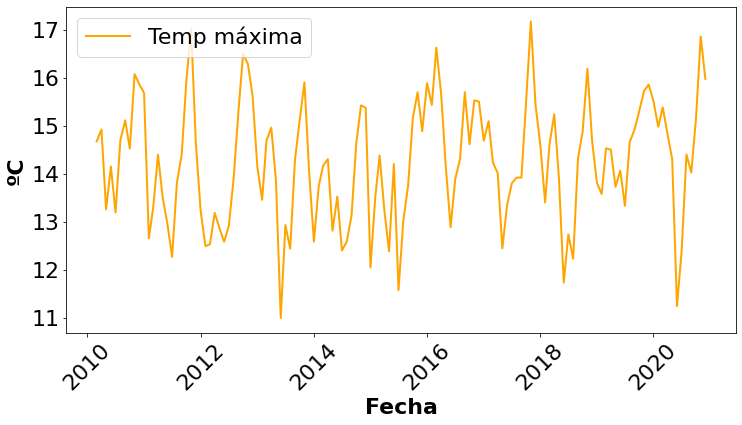

In [7]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmax'], 'orange', label='Temp máxima', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
# plt.title("Temperatura Máxima - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.title('', fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('ºC', fontweight='bold',fontsize=22)
plt.show()

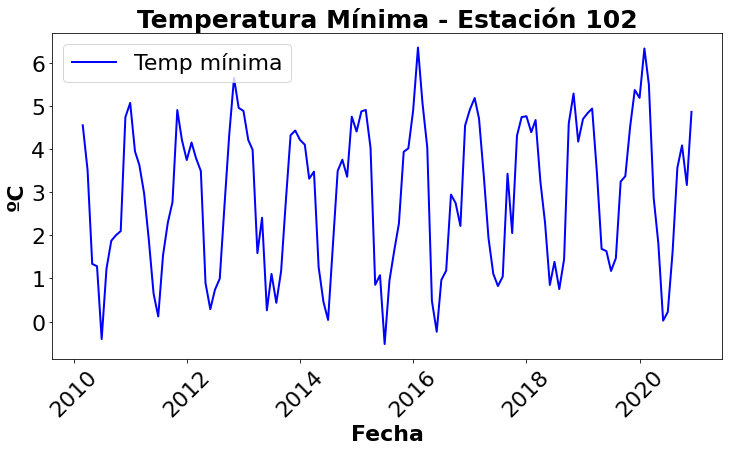

In [8]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmin'], 'blue', label='Temp mínima', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Temperatura Mínima - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('ºC', fontweight='bold',fontsize=22)
plt.show()

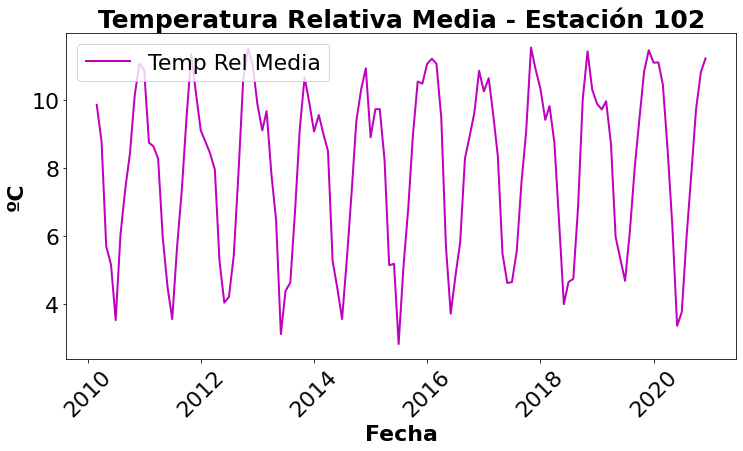

In [9]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmed'], 'm', label='Temp Rel Media', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Temperatura Relativa Media - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('ºC', fontweight='bold',fontsize=22)
plt.show()

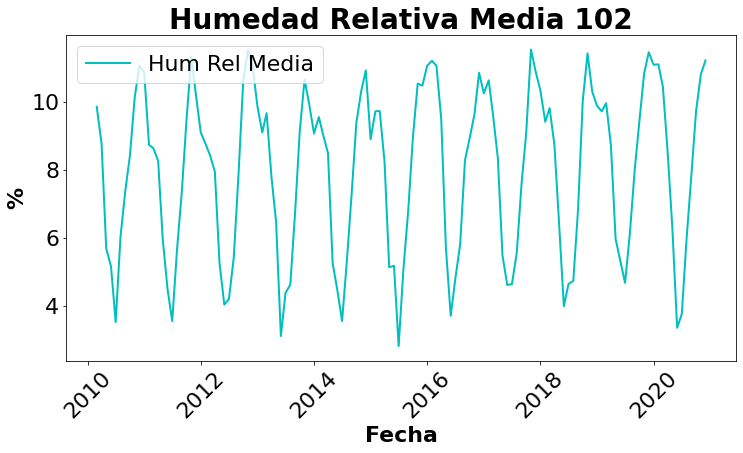

In [10]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmed'], 'c', label='Hum Rel Media', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Humedad Relativa Media "+str(estacion), fontweight='bold',fontsize=28)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('%', fontweight='bold',fontsize=22)
plt.show()

In [11]:
def graficar_datos(lista_datos1, lista_datos2, lista):
    data1=lista_datos1[0]
    data2=lista_datos2[0]
    for l in lista:
        try:
            plt.figure(figsize=(12,6))
            plt.plot(data1.loc[d1:d2,'fecha'], data1.loc[d1:d2,l], 'g', label=lista_datos1[1]+' - '+l, linewidth=2)
            plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
    #         plt.xticks(rotation = 45)
            plt.xticks(fontsize=22)
            plt.yticks(fontsize=22)
            plt.legend(fontsize=22,loc='upper left')
            plt.title("Correlación de "+lista_datos1[2], fontweight='bold',fontsize=28)
            plt.xlabel('Fecha', fontweight='bold',fontsize=22)
            plt.ylabel(lista_datos1[2], fontweight='bold',fontsize=22)
            plt.show()
        except:
            continue

In [12]:
consulta2 = datos
variable='pp'
consulta2 = datos[['mes','estacion',variable]]
# consulta1[consulta1['estacion'].astype(int) == estacion].reset_index(drop=True)
consulta2

,mes,estacion,pp
0,1,100,118.149
1,1,101,102.230
2,1,102,119.242
3,1,105,109.041
4,1,106,219.247
...,...,...,...
11515,12,201,65.049
11516,12,202,50.989
11517,12,203,87.368
11518,12,204,104.318


In [13]:
'''Estadística Descriptiva de precipitación mensual de todas las estaciones'''
# datos=datos.drop(['anio','mes'], axis=1)
# datos.describe()

'Estadística Descriptiva de precipitación mensual de todas las estaciones'

In [14]:
datos.columns

Index(['fecha', 'anio', 'mes', 'estacion', 'pp', 'tmax', 'tmin', 'tmed',
       'hmed', 'spi3', 'spi6', 'spi12', 'spei3', 'spei6', 'spei12'],
      dtype='object')

In [14]:
def variable(cad):
    if (cad.count('pp')>0): return 'Precipitación','[mm]'
    elif (cad.count('tmax')>0): return 'Temperatura Máxima','°C'
    elif (cad.count('tmin')>0): return 'Temperatura Mínima','°C'
    elif (cad.count('tmed')>0): return 'Temperatura Media','°C'
    elif (cad.count('hmed')>0): return 'Humedad Relativa Media','%'
    else: return cad.upper(),cad.upper()

def graficar_caja_total(x_lbl, datos, titulo='BoxPlot',):
    for i in range(4,15):
        if (datos.columns[i].count('i1')>0):
            continue
        else:
            
            nombre,unidad = variable(datos.columns[i])
            titulo = 'Diagrama de Cajas de '+nombre+' por '+x_lbl.capitalize()
            subdatos = datos[['mes','estacion',datos.columns[i]]]
            sns.set(rc={'figure.figsize':(15.7,8.27)})
            plt.title(titulo, c='darkblue', fontweight='bold', fontsize=23)
            sns.boxplot(x=x_lbl, y=datos.columns[i], data=subdatos)
            plt.ylabel(unidad, fontweight='bold', fontsize=25)
            plt.xlabel(x_lbl, fontweight='bold', fontsize=25)
            plt.xticks(fontsize=25)
            plt.yticks(fontsize=25)
            plt.show()
            

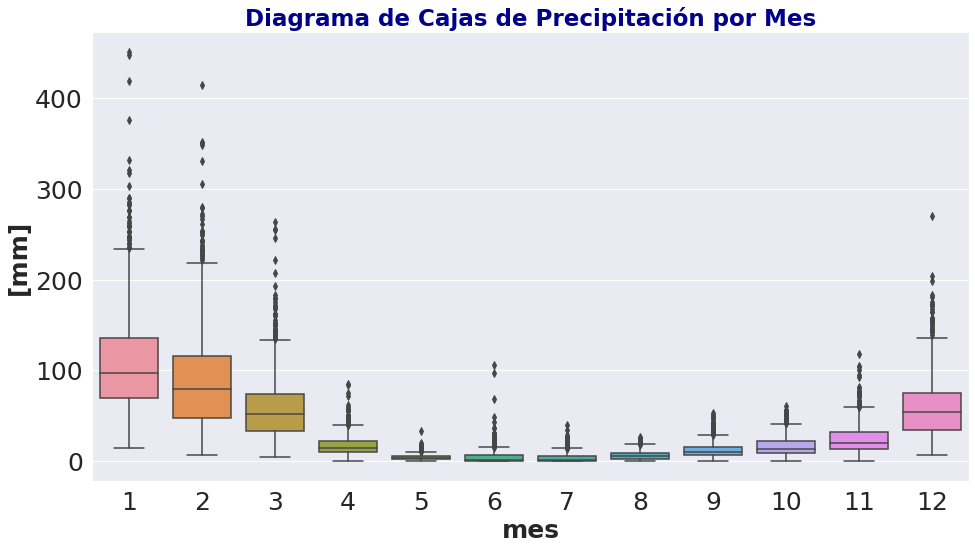

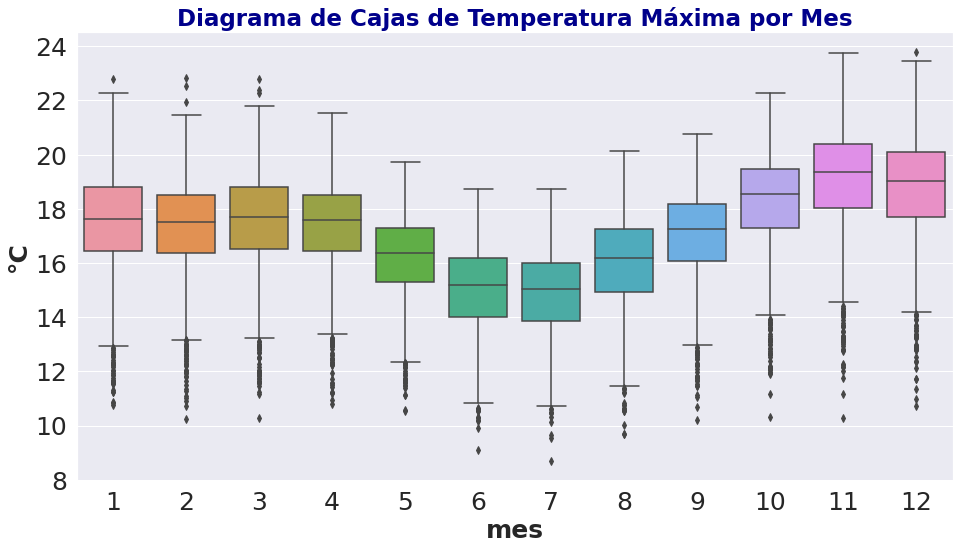

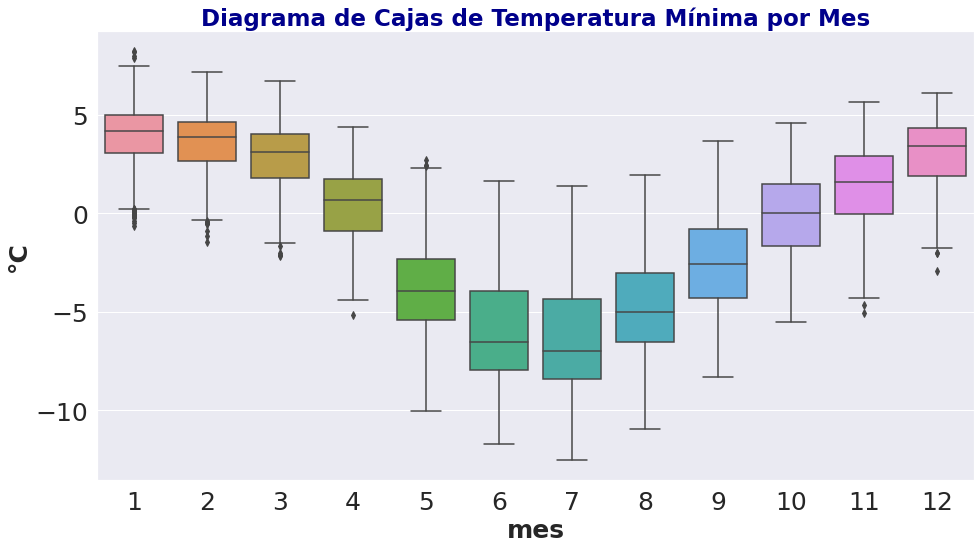

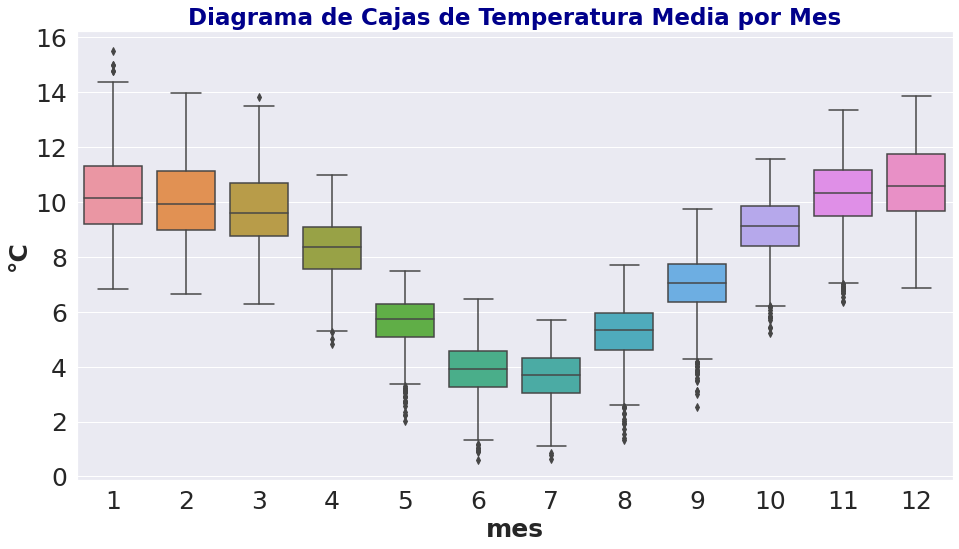

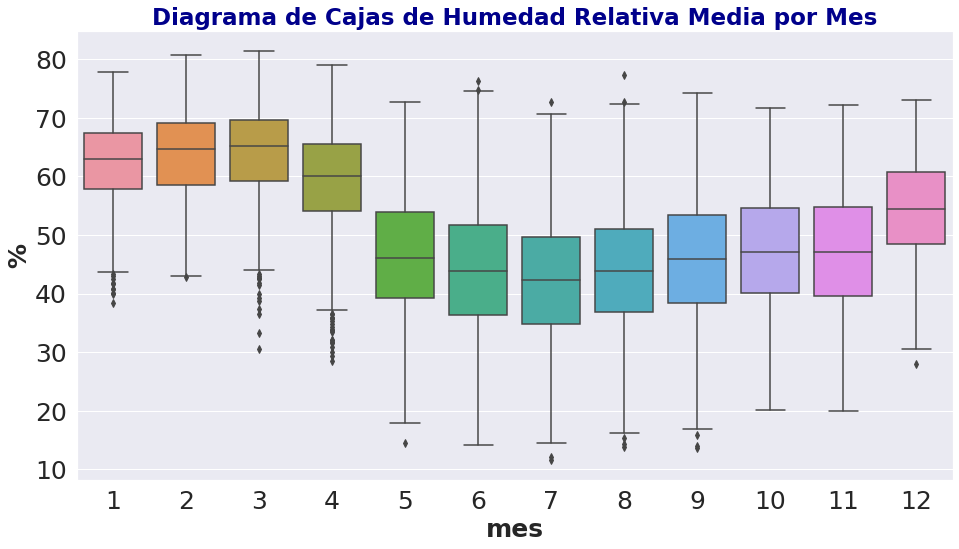

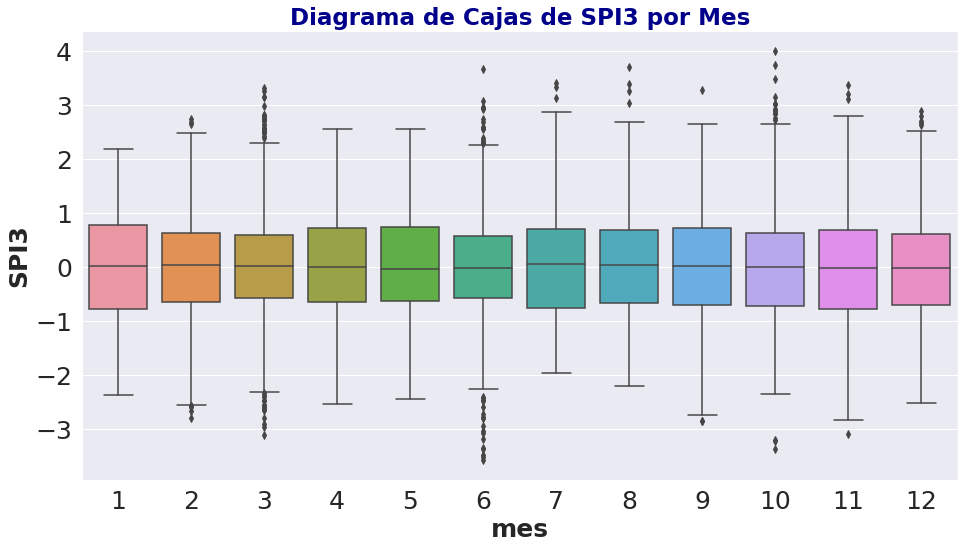

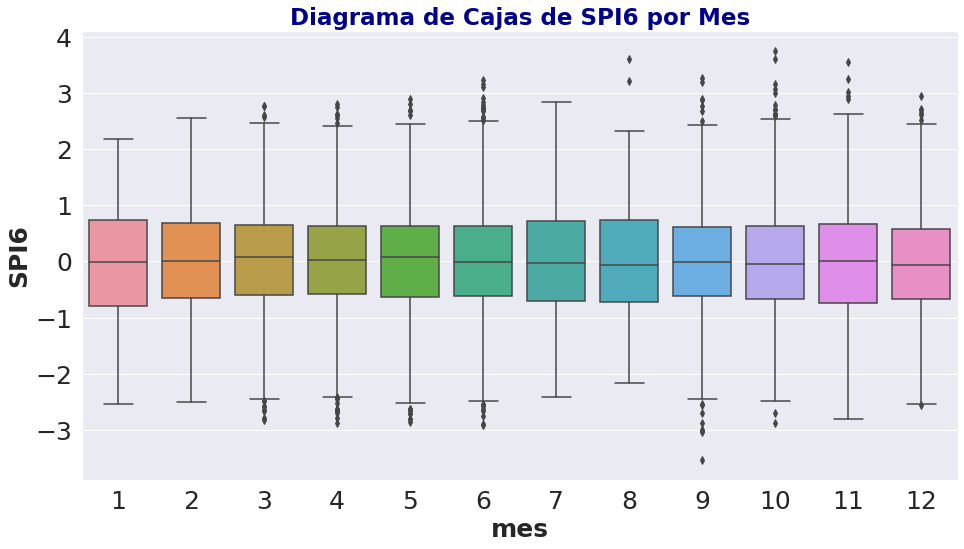

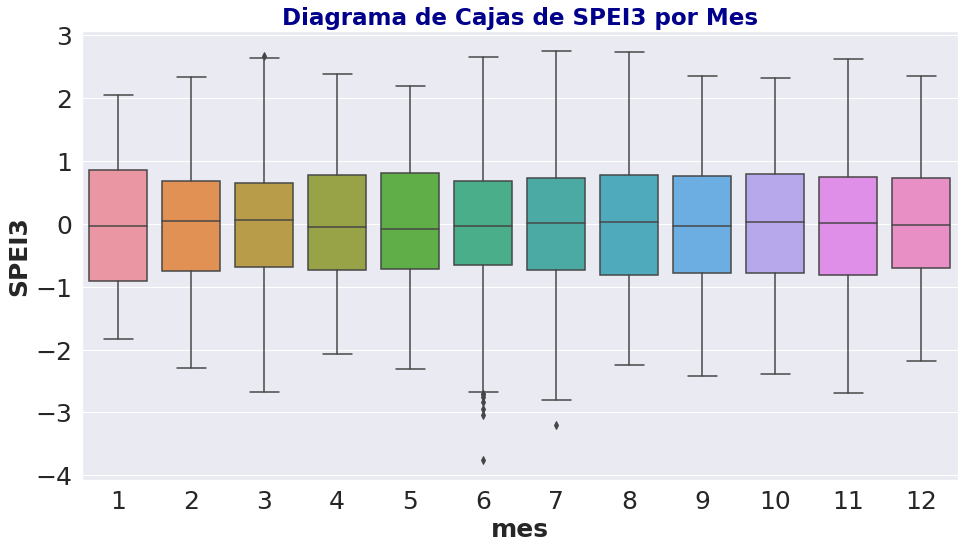

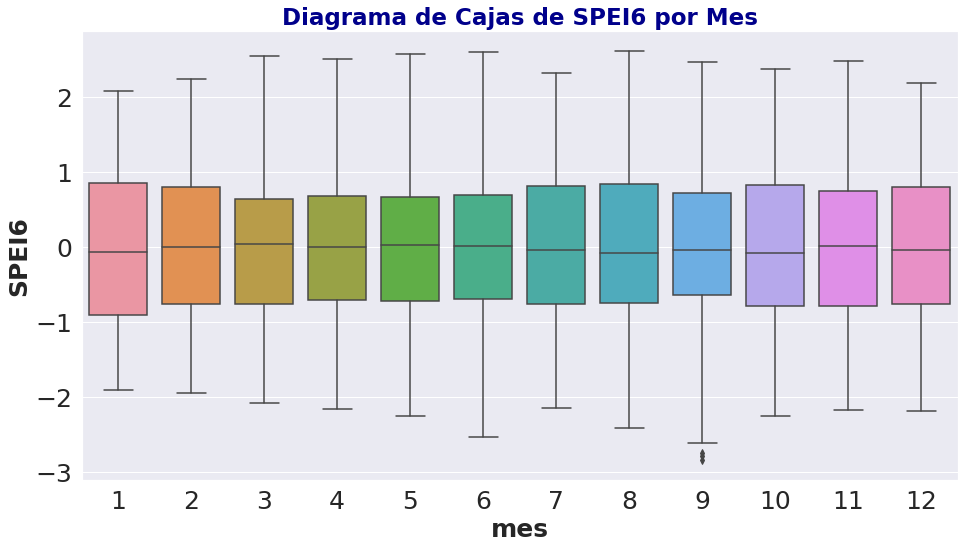

In [15]:
'''Diagrama de cajas por Variable mensual de todas las estaciones'''
graficar_caja_total('mes', datos=datos)

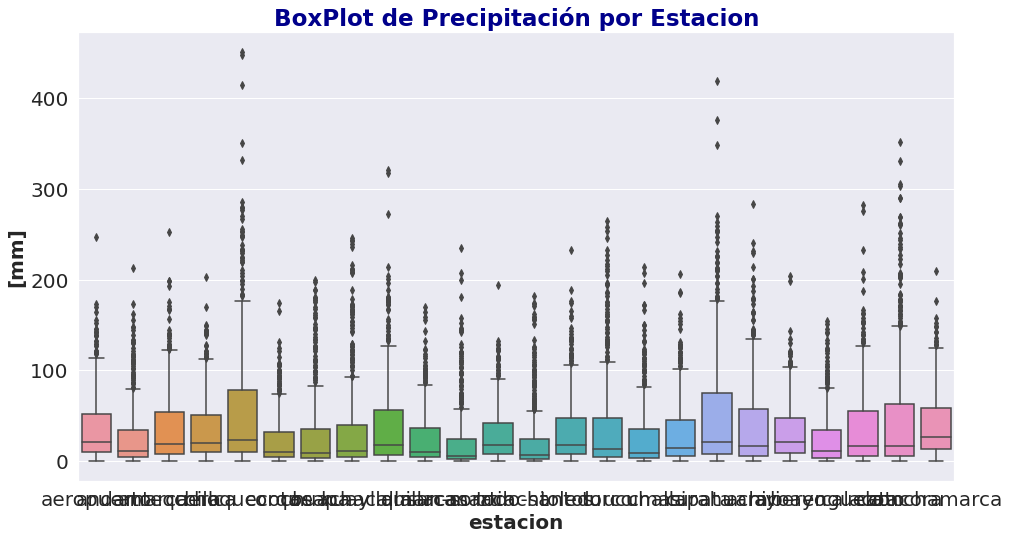

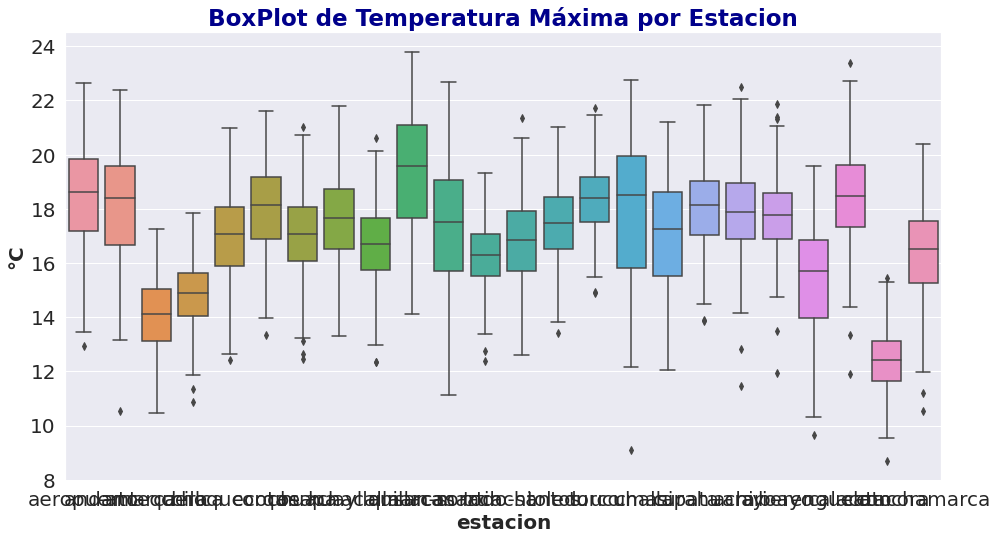

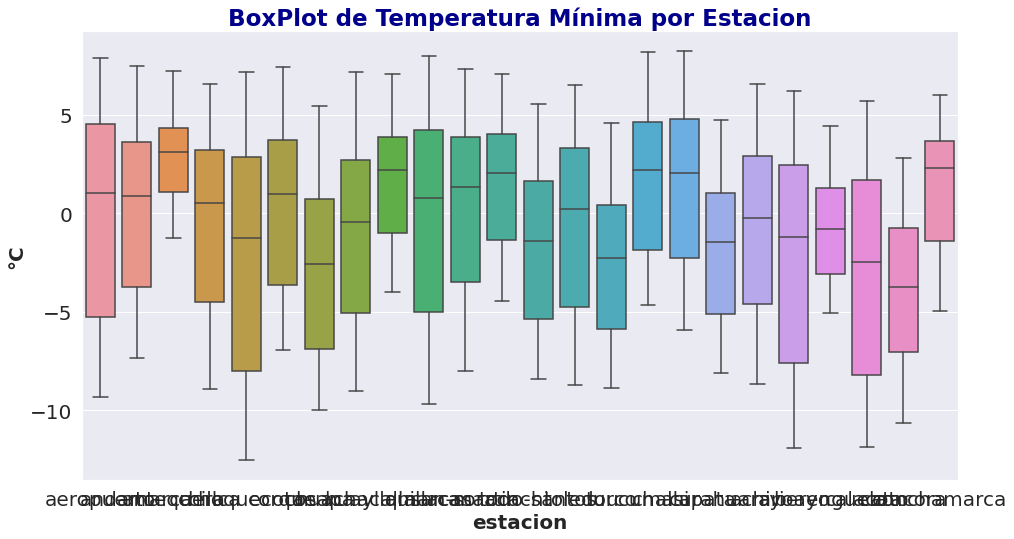

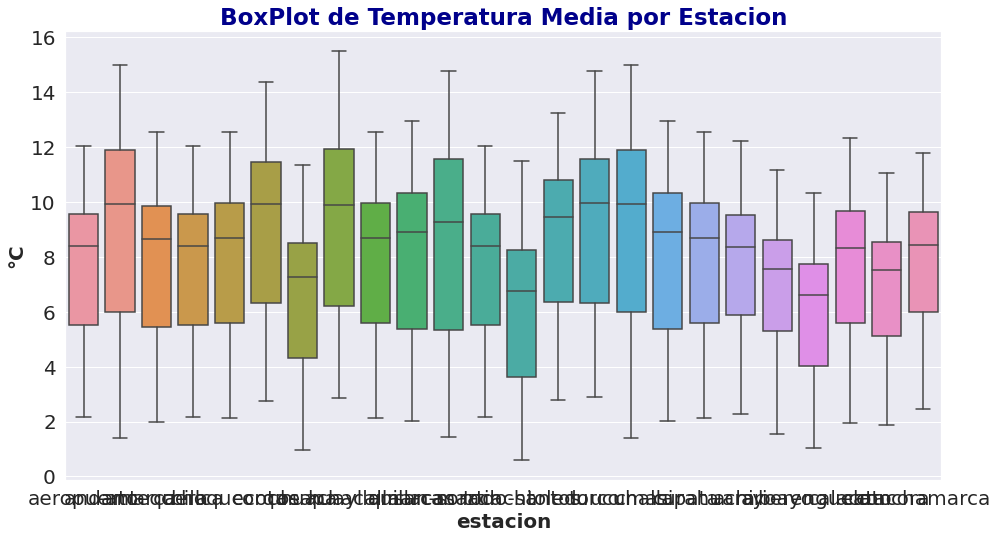

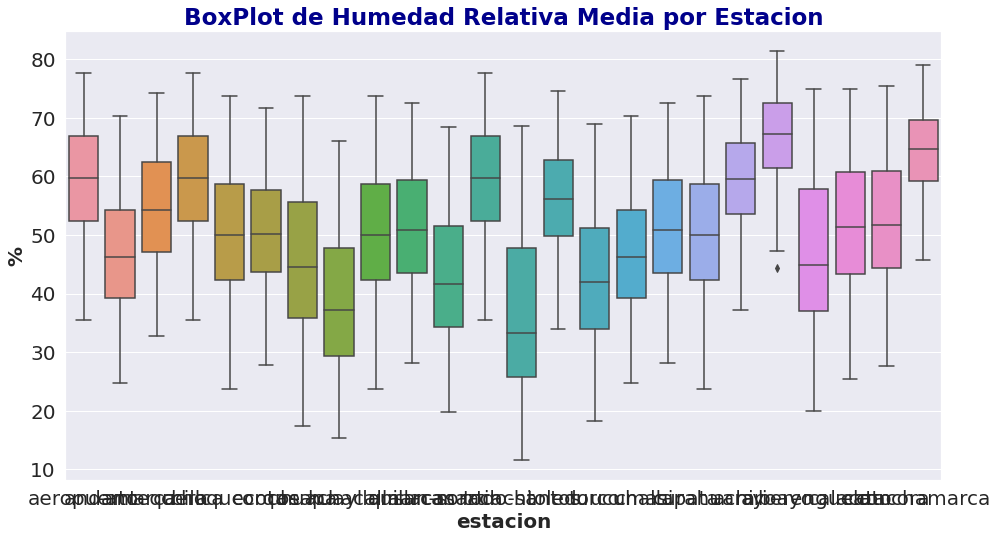

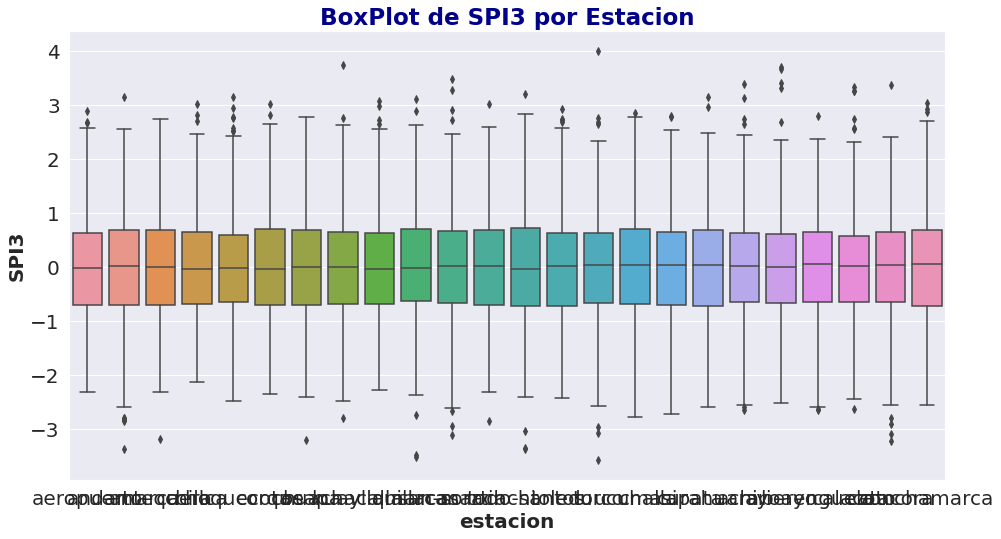

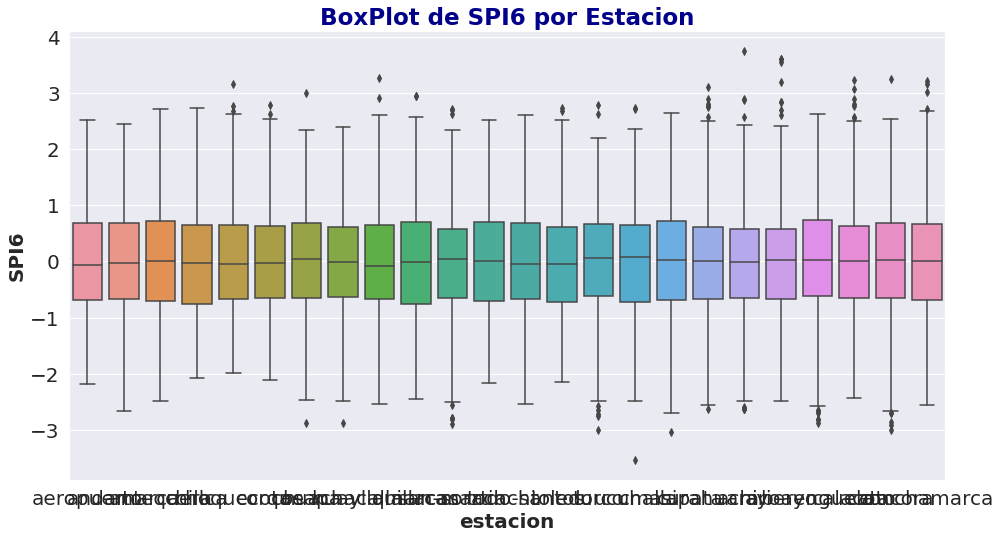

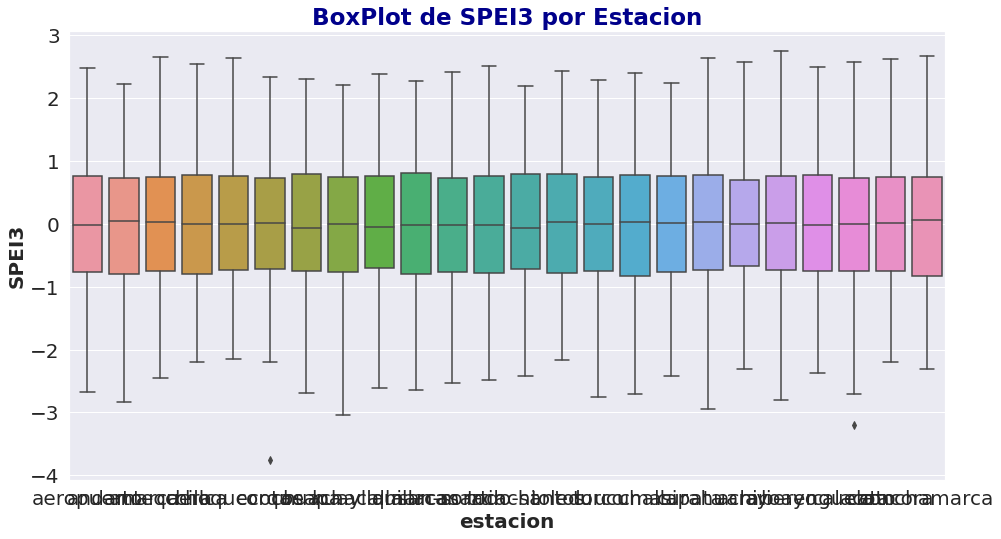

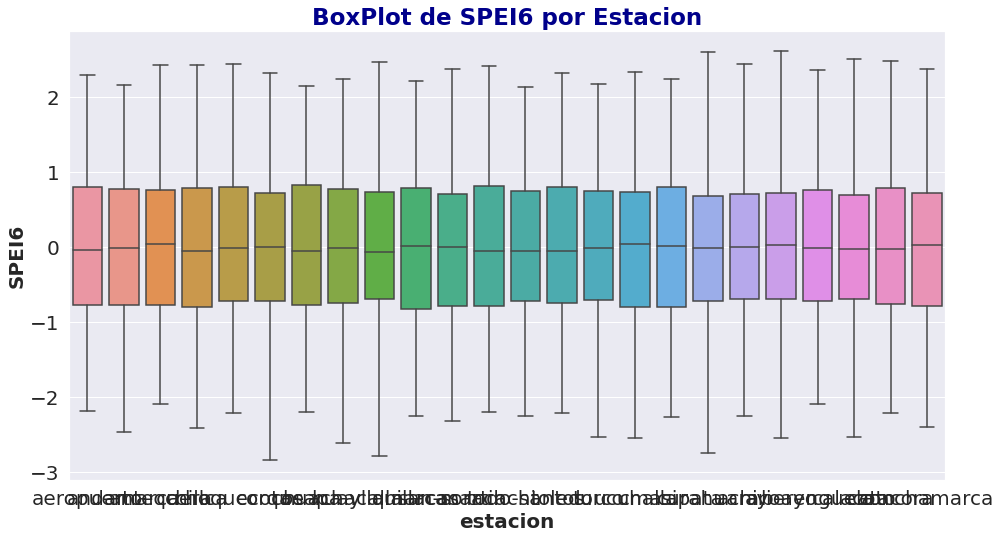

In [13]:
'''Diagrama de cajas por Variable respecto a las estaciones '''

graficar_caja_total('estacion', datos=datos)

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

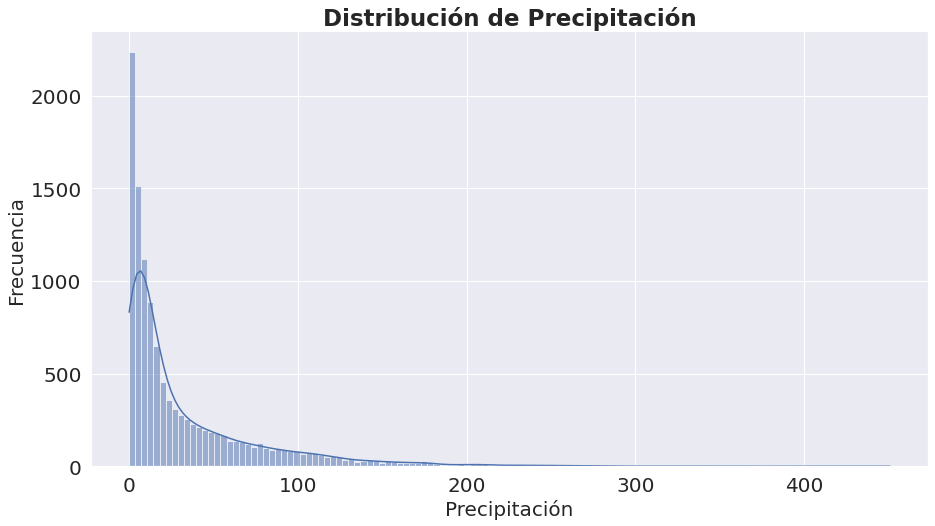

In [18]:
'''Distribución de precipitación'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['pp'],kde=True)
plt.title('Distribución de Precipitación',size=23, weight='bold')
plt.xlabel("Precipitación",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

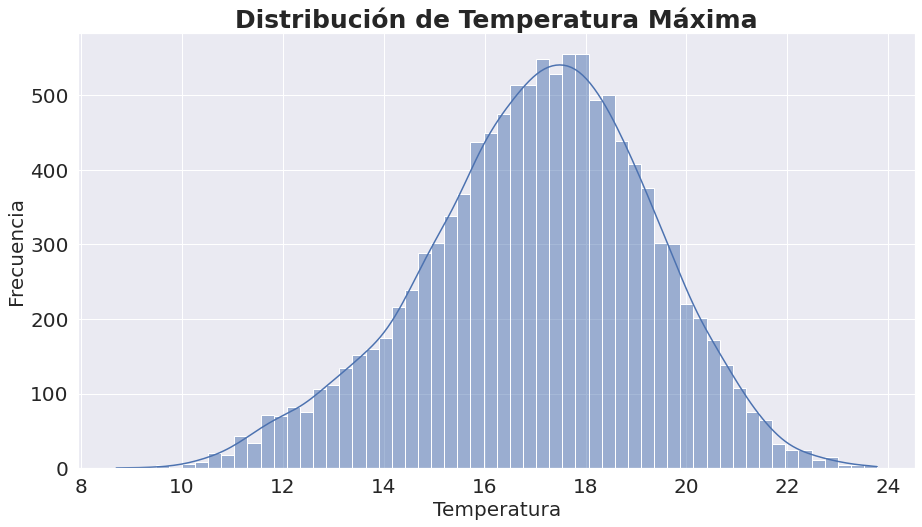

In [19]:
'''Distribución de Temperatura Máxima'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['tmax'],kde=True)
plt.title('Distribución de Temperatura Máxima',size=25, weight='bold')
plt.xlabel("Temperatura",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

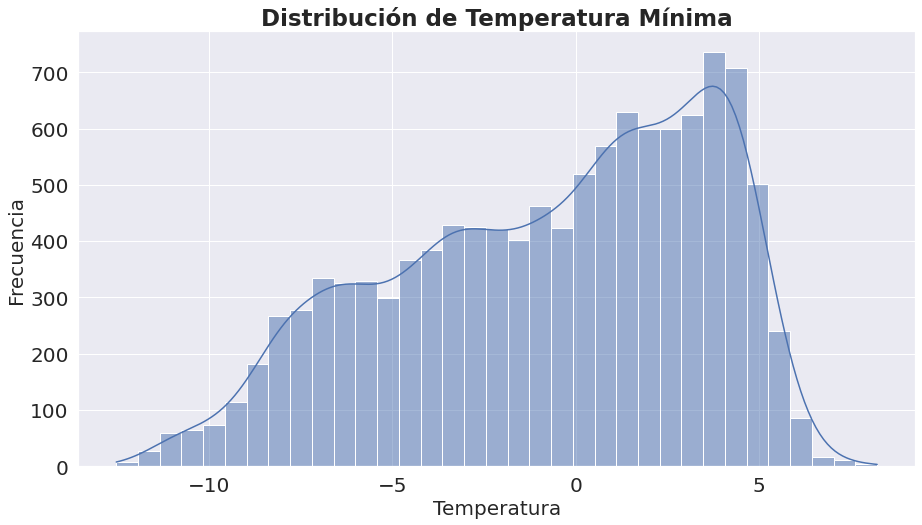

In [20]:
'''Distribución de Temperatura Mínima'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['tmin'],kde=True)
plt.title('Distribución de Temperatura Mínima',size=23, weight='bold')
plt.xlabel("Temperatura",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

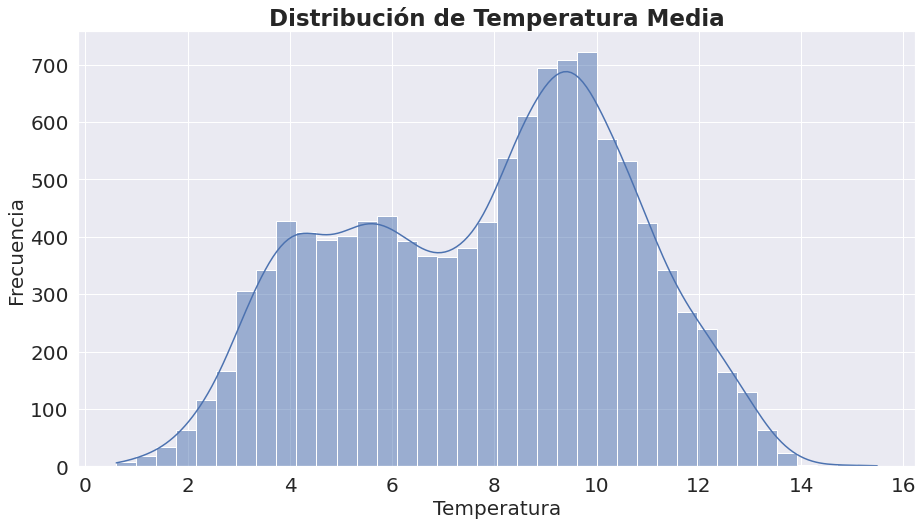

In [21]:
'''Distribución de Temperatura Media '''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['tmed'],kde=True)
plt.title('Distribución de Temperatura Media',size=23, weight='bold')
plt.xlabel("Temperatura",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

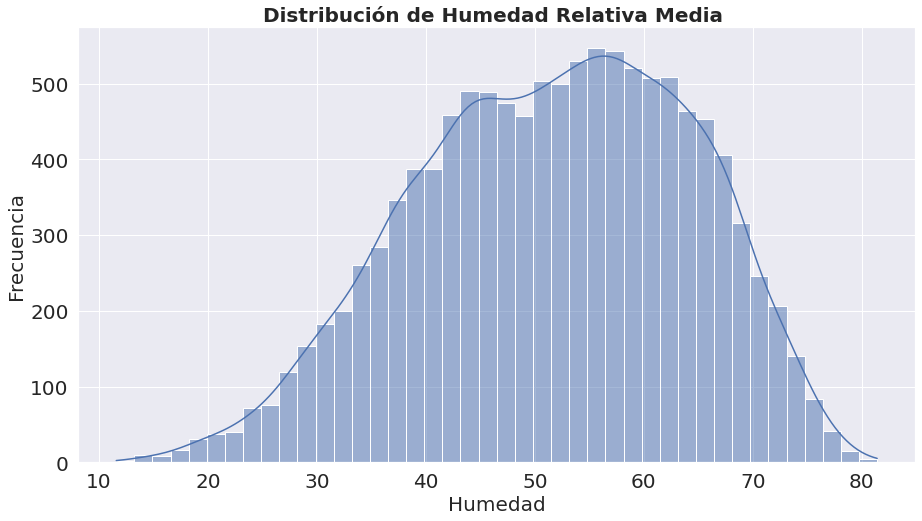

In [22]:
'''Distribución de Humedad Relativa Media '''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['hmed'],kde=True)
plt.title('Distribución de Humedad Relativa Media ',size=20, weight='bold')
plt.xlabel("Humedad",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

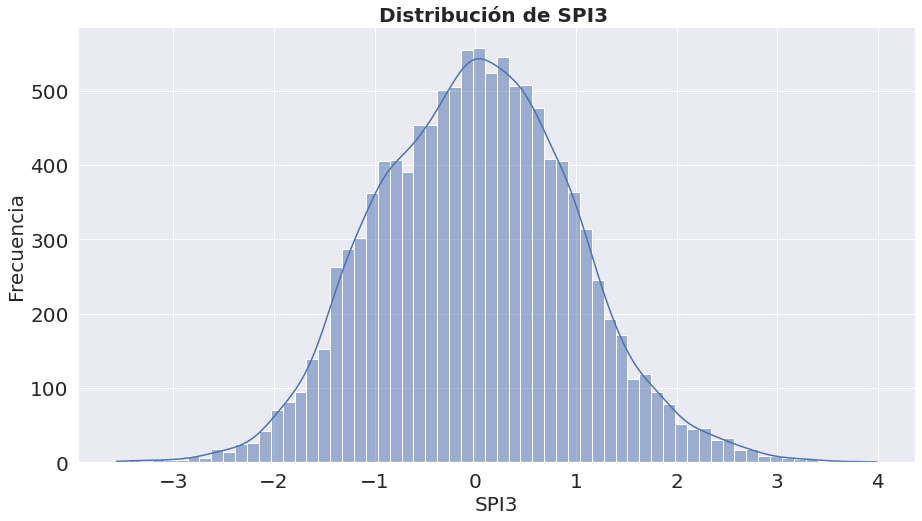

In [23]:
'''Distribución de SPI3'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['spi3'],kde=True)
plt.title('Distribución de SPI3 ',size=20, weight='bold')
plt.xlabel("SPI3",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

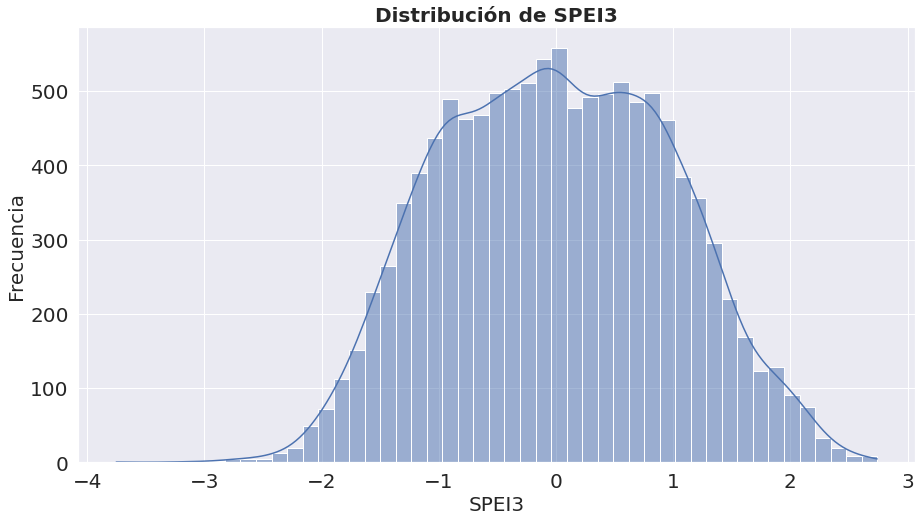

In [24]:
'''Distribución de SPEI3'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['spei3'],kde=True)
plt.title('Distribución de SPEI3',size=20, weight='bold')
plt.xlabel("SPEI3",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Verificación de datos faltantes y datos nulos

In [66]:
datos.describe()

,anio,mes,pp,tmax,tmin,tmed,hmed,spi3,spi6,spi12,spei3,spei6,spei12
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11472.000000,11400.000000,11256.000000,11472.000,11400.000000,11256.000000
mean,2000.500000,6.500000,33.598820,17.037100,-0.729409,7.806132,51.602942,0.008031,0.004233,0.002627,-inf,0.005394,0.005164
std,11.543897,3.452202,45.131442,2.265388,4.281310,2.793143,12.601594,0.975905,0.979344,0.984134,NaN,0.982430,0.980756
min,1981.000000,1.000000,0.000000,8.696000,-12.520000,0.604000,11.573000,-3.568000,-3.534000,-2.980000,-inf,-2.837000,-2.461000
25%,1990.750000,3.750000,5.101250,15.624750,-3.952000,5.488500,42.473500,-0.688000,-0.676000,-0.637000,-0.759,-0.751000,-0.733250
50%,2000.500000,6.500000,14.466500,17.184500,0.023500,8.275000,52.351000,0.007500,0.002000,0.017000,-0.004,-0.018000,-0.010000
75%,2010.250000,9.250000,45.846750,18.607500,2.924000,9.939000,61.476500,0.661000,0.666000,0.666250,0.754,0.758000,0.732000
max,2020.000000,12.000000,450.919000,23.780000,8.213000,15.486000,81.417000,3.993000,3.743000,3.032000,2.741,2.610000,2.473000


In [77]:
'''No se encontraron datos faltantes, ni atípicos; pero sí se encontró un dato no válido -inf'''
no_valido=datos[datos['spei3']=='-inf']
no_valido

,fecha,anio,mes,estacion,pp,tmax,tmin,tmed,hmed,spi3,spi6,spi12,spei3,spei6,spei12


In [ ]:
datos1=datos[datos['estacion']=='200'].reset_index(drop=True)
datos1

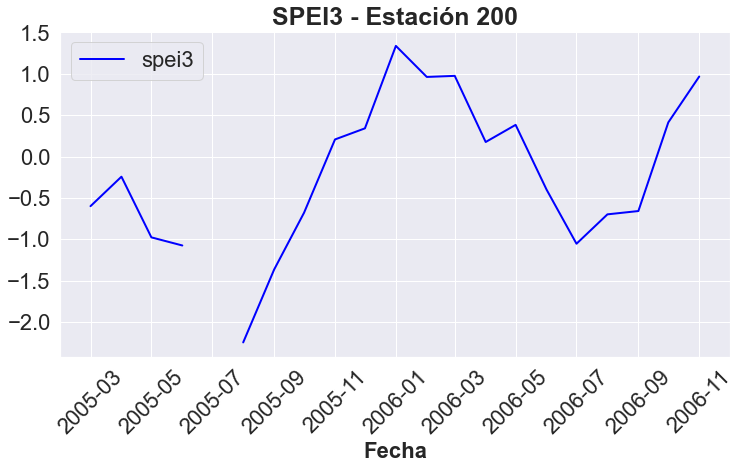

In [81]:
d1=290
d2=310
estacion=200
plt.figure(figsize=(12,6))
plt.plot(datos1.loc[d1:d2,'fecha'], datos1.loc[d1:d2,'spei3'], 'blue', label='spei3', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("SPEI3 - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('', fontweight='bold',fontsize=22)
plt.show()

In [82]:
sinf=datos[(datos['mes']==7) & (datos['estacion']=='200')].reset_index(drop=True)['spei3']
sinf1=sinf.replace([np.inf, -np.inf], np.nan) 
sinf1.min()

-1.523

In [83]:
datos.replace([np.inf,-np.inf], -1.523,inplace=True)
datos[(datos['mes']==7) & (datos['estacion']=='200')]['spei3']

162      0.024
450      0.464
738     -1.504
1026     0.528
1314     1.341
1602     0.519
1890     0.581
2178     1.137
2466     1.573
2754     1.592
3042     1.178
3330    -0.639
3618    -0.506
3906    -0.129
4194    -1.141
4482     0.006
4770    -0.047
5058    -0.676
5346    -1.236
5634    -0.469
5922     0.635
6210     1.100
6498     0.019
6786     0.666
7074    -1.523
7362    -1.053
7650     0.969
7938    -0.794
8226    -0.036
8514    -1.523
8802     0.132
9090    -0.561
9378     0.241
9666    -0.404
9954     0.015
10242   -0.780
10530   -0.111
10818    2.459
11106   -0.071
11394    0.163
Name: spei3, dtype: float64

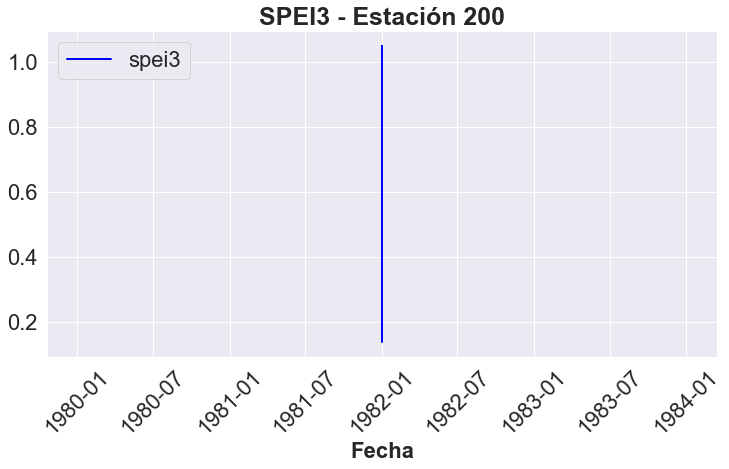

In [85]:
d1=290
d2=310
estacion=200
plt.figure(figsize=(12,6))
plt.plot(datos.loc[d1:d2,'fecha'], datos.loc[d1:d2,'spei3'], 'blue', label='spei3', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("SPEI3 - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('', fontweight='bold',fontsize=22)
plt.show()